In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


| COLUMN NAME                     | TYPE     | DESCRIPTION                                           |
|---------------------------------|----------|-------------------------------------------------------|
| recordid                        | integer  | Primary key of the record.                            |
| state                           | string   | Customer's state.                                     |
| account_length                  | integer  | Age of account in months.                             |
| area_code                       | string   | Area code.                                            |
| international_plan              | boolean  | Whether or not the customer has an international calling plan. |
| voice_mail_plan                 | boolean  | Whether or not the customer has a voice mail plan.    |
| number_vmail_messages           | integer  | Number of VM messages customer currently has on the server. |
| total_day_minutes               | decimal  | Customer's total usage of day minutes in plan.        |
| total_day_calls                 | integer  | Total number of calls customer has made during the day. |
| total_day_charge                | decimal  | How much the customer has been charged for day minutes. |
| total_eve_minutes               | decimal  | Customer's total usage of evening minutes in plan.    |
| total_eve_calls                 | integer  | Total number of calls customer has made during the evening. |
| total_eve_charge                | decimal  | How much the customer has been charged for evening minutes. |
| total_night_minutes             | decimal  | Customer's total usage of night minutes in plan.      |
| total_night_calls               | integer  | Total number of calls customer has made during the night. |
| total_night_charge              | decimal  | How much the customer has been charged for night minutes. |
| total_intl_minutes              | decimal  | Total international minutes.                          |
| total_intl_calls                | integer  | Total international calls.                            |
| total_intl_charge               | decimal  | Total international charges.                          |
| number_customer_service_calls   | integer  | How many times the customer has called the IVR system. |
| churn                           | boolean  | Customer has churned.                                 |
| customer_id                     | string   | Enterprise ID of the customer.                        |

In [4]:
data_path = './data/customer_data_edited.csv'

In [5]:
df = pd.read_csv(data_path)
df.head()

,recordid,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,False,False,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,False,23383607.0
1,2,MT,137,510,False,False,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,False,22550362.0
2,3,OH,103,408,False,True,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,False,59063354.0
3,4,NM,99,415,False,False,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,False,25464504.0
4,5,SC,108,415,False,False,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,False,691824.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordid                       12892 non-null  int64  
 1   state                          12892 non-null  object 
 2   account_length                 12892 non-null  int64  
 3   area_code                      12892 non-null  int64  
 4   international_plan             12892 non-null  bool   
 5   voice_mail_plan                12892 non-null  bool   
 6   number_vmail_messages          12892 non-null  int64  
 7   total_day_minutes              12892 non-null  float64
 8   total_day_calls                12892 non-null  int64  
 9   total_day_charge               12892 non-null  float64
 10  total_eve_minutes              12892 non-null  float64
 11  total_eve_calls                12892 non-null  int64  
 12  total_eve_charge               12892 non-null 

In [7]:
# remove customer_id column since its unique for each customer
df = df.drop('customer_id', axis=1)

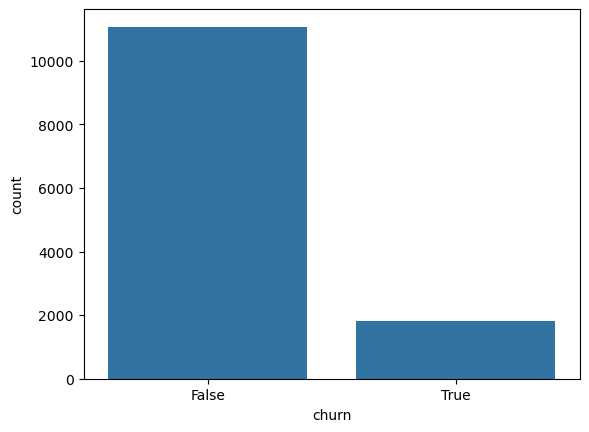

In [9]:
# how many customers churned
sns.countplot(df, x='churn')
plt.show()

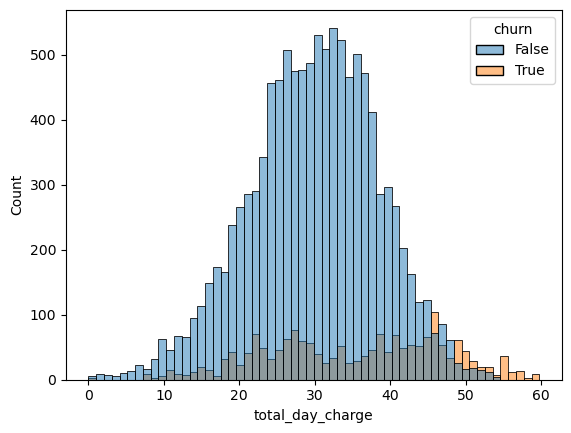

In [11]:
sns.histplot(df, x='total_day_charge', hue='churn')
plt.show()

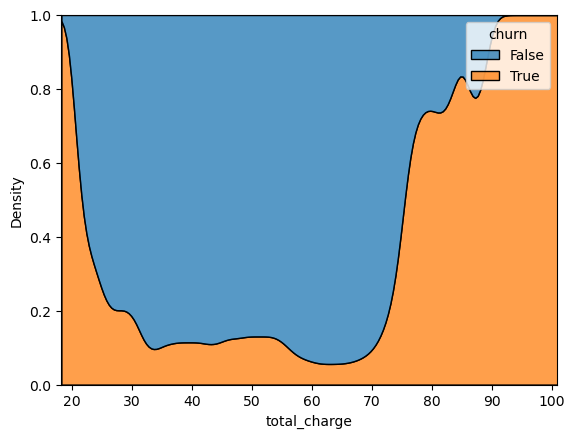

In [41]:
# since there are day charge, evening charge, night charge and international charge, we can combine them to get total charge
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']
sns.kdeplot(df, x='total_charge', hue='churn',multiple="fill")
plt.show()

In [58]:
# Seem like when the total charge is over 70, the churn rate is much higher
# Let's see if we can find a pattern in the total charge
temp = df
temp['over_80'] = temp['total_charge'] > 80
temp[temp['over_80']==True]['churn'].value_counts()

churn
True     247
False     73
Name: count, dtype: int64

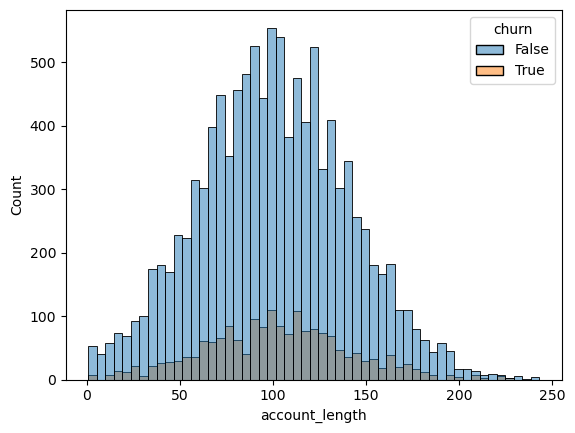

In [12]:
# see how long the customers have been with the company
sns.histplot(df, x='account_length', hue='churn')
plt.show()

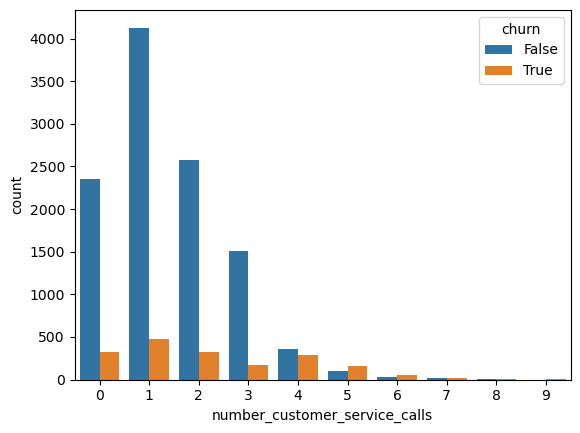

In [37]:
sns.countplot(df, x='number_customer_service_calls', hue='churn')
plt.show()

In [31]:
# churn rate by state
state_churn_counts = df.groupby(['state', 'churn']).size().unstack(fill_value=0)
churn_rate_by_state = state_churn_counts[True] / (state_churn_counts[True] + state_churn_counts[False])
churn_rate_by_state.sort_values(ascending=False, inplace=True)
churn_rate_by_state

state
CA    0.263158
NJ    0.258182
MD    0.228464
TX    0.228374
WA    0.209677
NV    0.206349
SC    0.203540
MS    0.200803
MT    0.200772
ME    0.199219
MI    0.191336
KS    0.181481
AR    0.178082
NY    0.176471
MA    0.171875
MN    0.162577
CT    0.159696
OK    0.152542
DE    0.152263
KY    0.144068
NC    0.142857
GA    0.141553
UT    0.141343
OR    0.140468
SD    0.139013
PA    0.136612
NH    0.135747
IN    0.134831
CO    0.133858
OH    0.131313
FL    0.128000
MO    0.122530
ID    0.117241
TN    0.115385
WV    0.114428
WY    0.110738
VT    0.107914
AL    0.103125
NM    0.101266
DC    0.095890
ND    0.095652
WI    0.087108
LA    0.082126
IL    0.081448
IA    0.080000
RI    0.079051
NE    0.076596
AZ    0.073171
AK    0.065327
VA    0.063973
HI    0.052381
dtype: float64

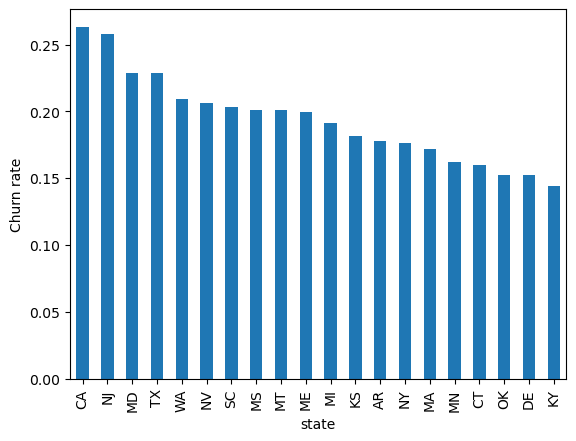

In [35]:
# plot top 10 states with highest churn rate
churn_rate_by_state.head(20).plot(kind='bar')
plt.ylabel('Churn rate')
plt.show()

In [ ]:
# CA and NJ are the top 2 states with highest churn rate, over 25% of customers in these states churned
